In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

ValueError: low >= high

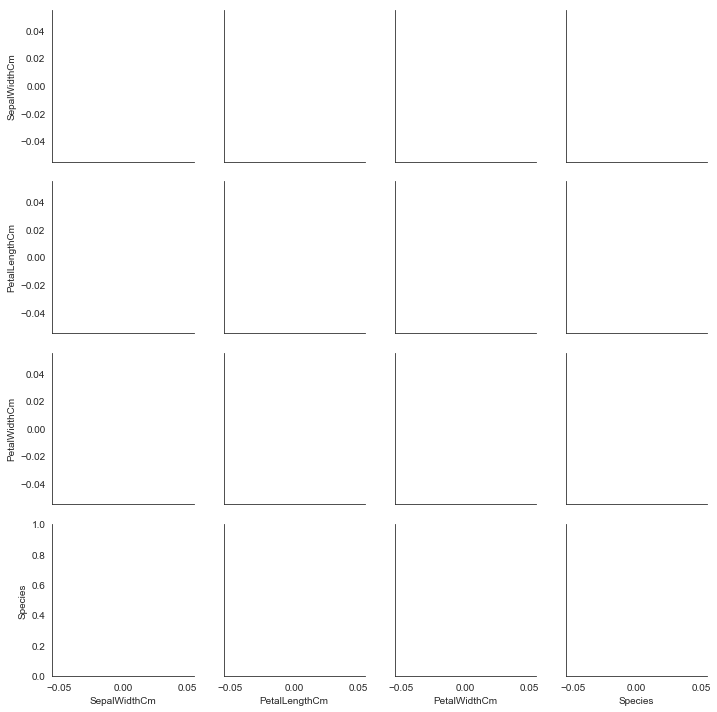

In [9]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

df = pd.read_csv('iris.csv')

# Take a subset of the data to make plots clearer.
df_czch = df.loc[
    ((df['Species'] == 'Iris-sentosa') | (df['Species'] == 'Iris-veriscolor')) & (df['Species'] == 'Iris-virginica'),
    ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
]

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_czch.loc[:, 'SepalWidthCm':'Species'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(1, 8, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm            NaN           NaN            NaN           NaN
SepalWidthCm             NaN           NaN            NaN           NaN
PetalLengthCm            NaN           NaN            NaN           NaN
PetalWidthCm             NaN           NaN            NaN           NaN


ValueError: zero-size array to reduction operation minimum which has no identity

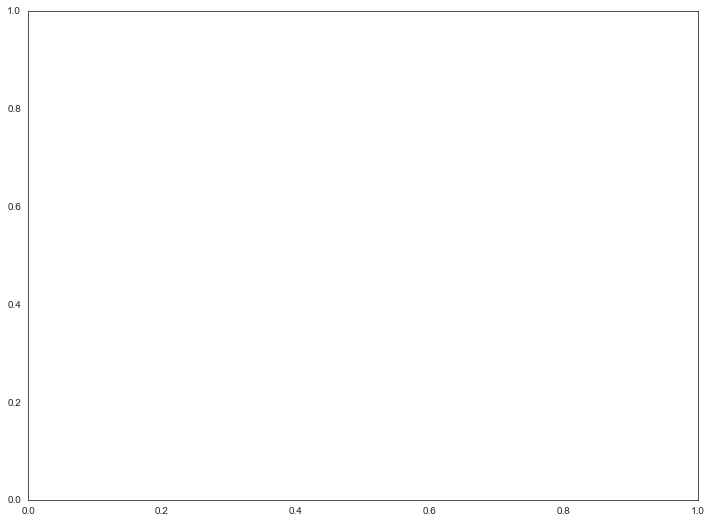

In [6]:
# Make the correlation matrix.
corrmat = df_czch.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.
